# 1. Data Preprocessing

## 1.1 Dependencies:

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1.2 Data Cleaning/Formatting

In [2]:
df = pd.read_csv('emissions_dataset.csv').drop(columns=['Unnamed: 0'])

In [3]:
df.isnull().values.any() 

False

In [4]:
# Check datatypes of the columns
print(df.dtypes)

Region                                             int64
Surface area                                     float64
Population in thousands                            int64
Population density                               float64
Sex ratio                                        float64
GDP: Gross domestic product                        int64
GDP growth rate                                  float64
GDP per capita                                   float64
Economy: Agriculture                             float64
Economy: Industry                                float64
Economy: Services and other activity             float64
Employment: Agriculture                          float64
Employment: Industry                             float64
Employment: Services                             float64
Unemployment                                     float64
Agricultural production index                      int64
Food production index                              int64
International trade: Exports   

In [5]:
df.head()

,Region,Surface area,Population in thousands,Population density,Sex ratio,GDP: Gross domestic product,GDP growth rate,GDP per capita,Economy: Agriculture,Economy: Industry,...,Population Age 0-14,Population Age 60+,Primary Enrolment Female,Primary Enrolment Male,Secondary Enrolment Female,Secondary Enrolment Male,Tertiary Enrolment Female,Tertiary Enrolment Male,Improved Drinking Water Urban,Improved Drinking Water Rural
0,17,652864.0,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,...,43.2,4.1,91.1,131.6,39.7,70.7,3.7,13.3,45.1,27.0
1,18,28748.0,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,...,17.4,19.0,111.7,115.5,92.5,98.8,68.1,48.7,95.5,90.2
2,9,2381741.0,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,...,29.3,9.4,112.7,119.5,101.7,98.1,45.1,28.9,89.8,82.2
3,18,468.0,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,...,14.4,19.0,-99.0,0.0,-99.0,0.0,-99.0,0.0,100.0,100.0
4,8,1246700.0,29784,23.9,96.2,117955,3.0,4714.1,6.8,51.2,...,46.8,4.0,100.4,156.9,22.7,35.1,8.2,10.4,88.6,22.5


## 1.3 Normalizing

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Region,Surface area,Population in thousands,Population density,Sex ratio,GDP: Gross domestic product,GDP growth rate,GDP per capita,Economy: Agriculture,Economy: Industry,...,Population Age 0-14,Population Age 60+,Primary Enrolment Female,Primary Enrolment Male,Secondary Enrolment Female,Secondary Enrolment Male,Tertiary Enrolment Female,Tertiary Enrolment Male,Improved Drinking Water Urban,Improved Drinking Water Rural
0,0.809524,0.038189,0.025206,0.002608,0.512994,0.001129,0.770950,0.004258,0.720259,0.683622,...,0.953083,0.122754,0.766841,0.838751,0.501265,0.452046,0.482840,0.116667,0.724121,0.270
1,0.857143,0.001687,0.002077,0.005129,0.501999,0.000645,0.810854,0.024077,0.714959,0.698714,...,0.780161,0.568862,0.849939,0.736138,0.692085,0.631714,0.785614,0.427193,0.977387,0.902
2,0.428571,0.139302,0.029312,0.000826,0.502249,0.009141,0.820431,0.025079,0.654888,0.761878,...,0.859920,0.281437,0.853973,0.761632,0.725334,0.627238,0.677480,0.253509,0.948744,0.822
3,0.857143,0.000033,0.000053,0.007862,0.502999,0.000161,0.796488,0.235835,0.585984,0.613751,...,0.760054,0.568862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000
4,0.380952,0.072919,0.021129,0.001143,0.487756,0.006545,0.814046,0.028381,0.623086,0.839575,...,0.977212,0.119760,0.804357,1.000000,0.439827,0.224425,0.503996,0.091228,0.942714,0.225


## 1.4 Splitting Data

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['CO2 emission estimates'])
y = df[['CO2 emission estimates']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

# 2. Evaluation Function

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

def evaluate_features(selected_features, method_name):
    reg = RandomForestRegressor()
    reg.fit(X_train[selected_features], y_train)
    y_pred = reg.predict(X_test[selected_features])
    r2 = r2_score(y_test, y_pred)
    print(f"Method: {method_name} \nSelected Features: {selected_features} \nR^2: {r2:.4f}")
    return r2

# 3. Statistical Selection

## 3.1 Univariate + Bivariate Statistics

- Hover over the plot and select the bar graph icon. This will allow you to zoom in and see the plots better.
- Note univariate distributions on the diagonal, and bivariate elsewhere. 

In [9]:
# Note: this may take a while; it took 3 minutes for me. 
#df_train = pd.concat([X_train, .], axis=1)
#sns.pairplot(df_train)

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

univariate_selector = SelectKBest(score_func=f_classif, k='all')
univariate_selector.fit(X_train, y_train)
selected_features_uni = X_train.columns[np.argsort(univariate_selector.scores_)[-5:]]  # Select top 5 features
univariate_r2 = evaluate_features(selected_features_uni, "Univariate")

Method: Univariate 
Selected Features: Index(['International trade: Balance',
       'Refugees and others of concern to UNHCR', 'Surface area',
       'GDP: Gross domestic product', 'Population in thousands'],
      dtype='object') 
R^2: 0.6465


/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## 3.2 Correlation / Covariance

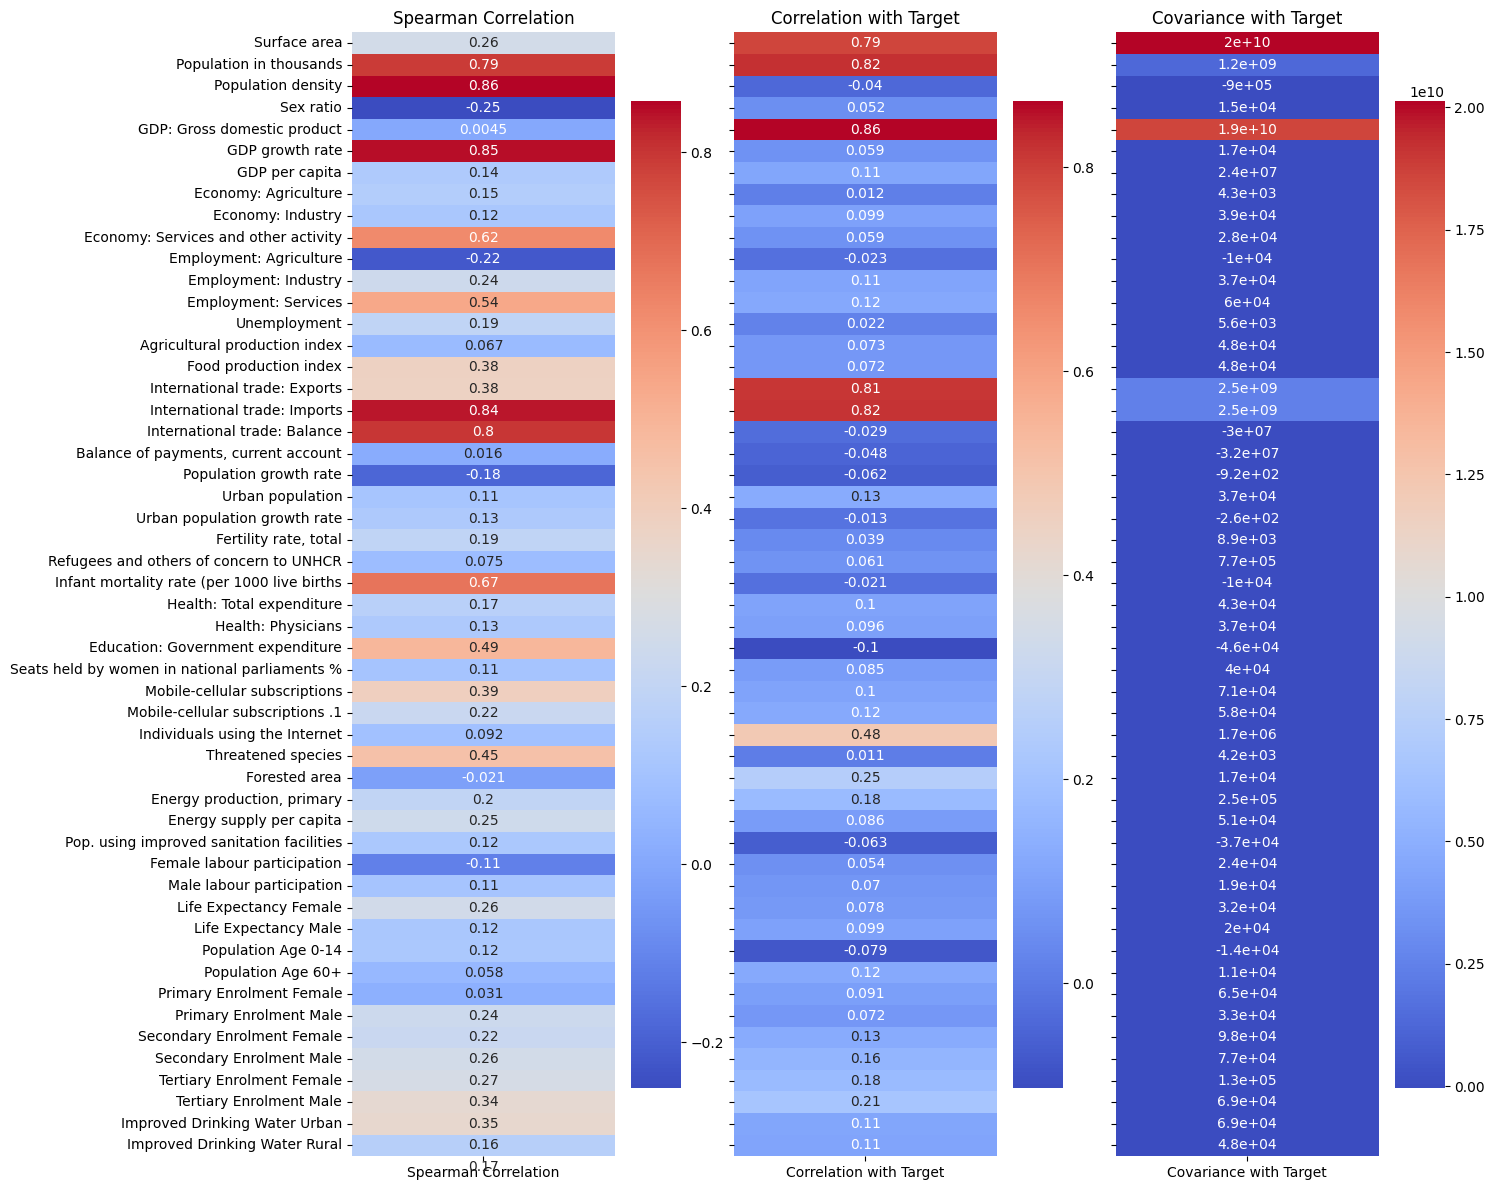

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

df_train = pd.concat([X_train, y_train], axis=1)

# Compute Spearman's rank correlation coefficients for each feature with y_train
spearman_corrs = [spearmanr(X_train[col], y_train)[0] for col in X_train.columns]

# Compute correlations and covariances
correlations = df_train.corr()
target_correlations = correlations['CO2 emission estimates'][1:-1]  # Omit index and correlation with itself

covariances = df_train.cov()
target_covariances = covariances['CO2 emission estimates'][1:-1]  # Omit covariance with itself

# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 12), sharey=True)

# Plot Spearman correlation heatmap
sns.heatmap(
    np.array(spearman_corrs).reshape(-1, 1),
    annot=True,
    cmap='coolwarm',
    cbar=True,
    ax=axes[0],
    yticklabels=X_train.columns,
    xticklabels=['Spearman Correlation'],
)
axes[0].set_title('Spearman Correlation')

# Plot correlation heatmap
sns.heatmap(
    target_correlations.to_frame(),
    annot=True,
    cmap='coolwarm',
    cbar=True,
    ax=axes[1],
    xticklabels=['Correlation with Target'],
)
axes[1].set_title('Correlation with Target')

# Plot covariance heatmap
sns.heatmap(
    target_covariances.to_frame(),
    annot=True,
    cmap='coolwarm',
    cbar=True,
    ax=axes[2],
    xticklabels=['Covariance with Target'],
)
axes[2].set_title('Covariance with Target')

# Adjust layout
plt.tight_layout()
plt.show()

## 3.3 Mutual Information

In [12]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)
selected_features_mi = X_train.columns[np.argsort(mutual_info)[-5:]]  # Select top 5 features
evaluate_features(selected_features_mi, "Mutual Information")

Method: Mutual Information 
Selected Features: Index(['Refugees and others of concern to UNHCR',
       'GDP: Gross domestic product', 'International trade: Exports',
       'Population in thousands', 'Surface area'],
      dtype='object') 
R^2: 0.6278


/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6277989391459299

## 3.4 L1 Regularization (LASSO)

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
selected_features_lasso = X_train.columns[np.where(lasso.coef_ != 0)[0]]
evaluate_features(selected_features_lasso, "Lasso")

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.797e+08, tolerance: 2.123e+06
  model = cd_fast.enet_coordinate_descent(
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Method: Lasso 
Selected Features: Index(['Region', 'Surface area', 'Population in thousands',
       'Population density', 'Sex ratio', 'GDP: Gross domestic product',
       'GDP growth rate', 'GDP per capita', 'Economy: Agriculture',
       'Economy: Industry', 'Economy: Services and other activity',
       'Employment: Agriculture', 'Employment: Industry',
       'Employment: Services', 'Unemployment', 'Agricultural production index',
       'Food production index', 'International trade: Exports',
       'International trade: Imports', 'International trade: Balance',
       'Balance of payments, current account', 'Population growth rate',
       'Urban population', 'Urban population growth rate',
       'Fertility rate, total', 'Refugees and others of concern to UNHCR',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure', 'Health: Physicians',
       'Education: Government expenditure',
       'Seats held by women in national parliaments %',
     

0.7039966969840601

## 3.5 Variance Thresholds

In [14]:
from sklearn.feature_selection import VarianceThreshold

variance_selector = VarianceThreshold(threshold=1)
variance_selector.fit(X_train)
selected_features_var = X_train.columns[np.where(variance_selector.get_support())[0]]
evaluate_features(selected_features_var, "Variance Threshold")

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Method: Variance Threshold 
Selected Features: Index(['Region', 'Surface area', 'Population in thousands',
       'Population density', 'Sex ratio', 'GDP: Gross domestic product',
       'GDP growth rate', 'GDP per capita', 'Economy: Agriculture',
       'Economy: Industry', 'Economy: Services and other activity',
       'Employment: Agriculture', 'Employment: Industry',
       'Employment: Services', 'Unemployment', 'Agricultural production index',
       'Food production index', 'International trade: Exports',
       'International trade: Imports', 'International trade: Balance',
       'Balance of payments, current account', 'Population growth rate',
       'Urban population', 'Urban population growth rate',
       'Fertility rate, total', 'Refugees and others of concern to UNHCR',
       'Infant mortality rate (per 1000 live births',
       'Health: Total expenditure', 'Health: Physicians',
       'Education: Government expenditure',
       'Seats held by women in national parliame

0.658245942479261

# 4. Iterative Feature Selection

## 4.1 Forward / Sequential

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector

seq_selector = SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select=5, direction='forward')
seq_selector.fit(X_train, y_train)
selected_features_seq = X_train.columns[np.where(seq_selector.get_support())[0]]
evaluate_features(selected_features_seq, "Sequential")

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Method: Sequential 
Selected Features: Index(['Population in thousands', 'Sex ratio', 'GDP growth rate',
       'Refugees and others of concern to UNHCR', 'Forested area'],
      dtype='object') 
R^2: -3.6855


/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-3.6855222433349306

## 4.2 Backward / RFE

In [16]:
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
rfe_selector.fit(X_train, y_train)
selected_features_rfe = X_train.columns[np.where(rfe_selector.get_support())[0]]
evaluate_features(selected_features_rfe, "RFE")

/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Method: RFE 
Selected Features: Index(['Surface area', 'Population in thousands',
       'GDP: Gross domestic product', 'International trade: Exports',
       'Balance of payments, current account'],
      dtype='object') 
R^2: 0.5611


0.561051176089114

# 5. Model Based

## 5.1 PCA

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
reg_pca = RandomForestRegressor()
reg_pca.fit(X_train_pca, y_train)
y_pred_pca = reg_pca.predict(X_test_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"PCA - R^2: {r2_pca:.4f}")

PCA - R^2: 0.1181


/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## 5.2 LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
reg_lda = RandomForestRegressor()
reg_lda.fit(X_train_lda, y_train)
y_pred_lda = reg_lda.predict(X_test_lda)
r2_lda = r2_score(y_test, y_pred_lda)
print(f"LDA - R^2: {r2_lda:.4f}")

LDA - R^2: -4.3520


/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xanderyoon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
